In [43]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('drive/MyDrive/DEV/heart_disease_classification/heart_attack.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

In [ ]:
data.size

In [ ]:
data.columns

In [ ]:
data.duplicated().sum()

In [ ]:
data.isnull().any()

ANALISE EXPLORATORIA DOS DADOS

In [ ]:
data.info()

In [ ]:
data.describe().round(2)

In [ ]:
data.nunique()

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Colunas Numericas:",numerical_columns)

object_columns = data.select_dtypes(include=['object']).columns
print("\nColunas de Objetos:",object_columns)

In [ ]:
for column in numerical_columns:
    unique_value = data[column].unique()
    print(f"{column}:{unique_value}")

In [30]:
for column in object_columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

class: ['negative' 'positive']


In [ ]:
for column in numerical_columns:
    value_counts = data[column].value_counts()
    print(column,':')
    print(value_counts)
    print('\n')

ANALISE GRAFICA DOS DADOS

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in numerical_columns:
  fig = go.Figure(data = [go.Bar(x=data[i].value_counts().index,y=data[i].value_counts(),uid =None)])
  fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Contador")
  fig.show()

In [ ]:
for i in object_columns:
    fig = go.Figure(data=[go.Bar(x=data[i].value_counts().index, y=data[i].value_counts())])
    fig.update_layout(
        title= i,
        xaxis_title= i,
        yaxis_title="Contador"
    )
    fig.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(data[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(data[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x=data[i], nbinsx=20)])
    fig.update_layout(
        title=f'Histograma {i}',
        xaxis_title=i,
        yaxis_title="Contador"
    )
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))
    fig.show()

In [ ]:
fig = px.bar(
    data,
    x='class',
    y='age',
    title='Média de Impulso pela idade',
    color='age',
    barmode='group'
)
fig.show()

In [ ]:
fig = px.bar(
    data,
    x='class',
    y='pressurehight',
    title='Média de pressão por idade"',
    color='age',
    barmode='group'
)
fig.show()

In [ ]:
fig = px.bar(
    data,
    x='age',
    y='pressurelow',
    title='Média de pressão mínima por idade',
    color='class',
    barmode='group'
)
fig.show()

In [ ]:
fig = px.bar(
    data,
    x='age',
    y='glucose',
    title='Média de glicose por classe',
    color='class',
    barmode='group'
)
fig.show()

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(14, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Matriz de Correlação')
plt.show()

CRIAÇÃO DO MODELO E TREINO DA INTELIGENCIA ARTIFICIAL

In [45]:
# Mapeia os dados da coluna 'class' transformando de texto para opção binária
data['class'] = data['class'].map({'negative': 0, 'positive': 1})

# Aqui dividimos a base de dados entre dados variaveis e resultados
X = data.drop('class', axis=1) #Retira a coluna de class e configura X como dados variaveis
y = data['class'] #Cria a coluna de resultados utilizando a coluna do database original class

USANDO O ALGORITMO Logistic Regression - Teste 1

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
#Separa os dados entre os dados variaveis de treino e teste e faz o mesmo com os dados de resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
scaler = StandardScaler()
'''
No contexto de aprendizado de máquina e pré-processamento de dados, um "scaler" (escalador)
é uma técnica usada para transformar as características (atributos) de um conjunto de dados
de modo que tenham uma escala padrão. Isso é especialmente útil quando as características
têm escalas diferentes, o que pode afetar o desempenho e a convergência de certos algoritmos
de aprendizado de máquina.
'''
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Cria o modelo de Regressão Logística
model = LogisticRegression()

# Treina o modelo usando a base de dados tratada com o Scaler
model.fit(X_train_scaled, y_train)

In [50]:
y_pred = model.predict(X_test_scaled)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Acuracia:", accuracy)

print(classification_report(y_test, y_pred))

# Imprime a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9772727272727273
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Confusion Matrix:
[[ 98   3]
 [  3 160]]


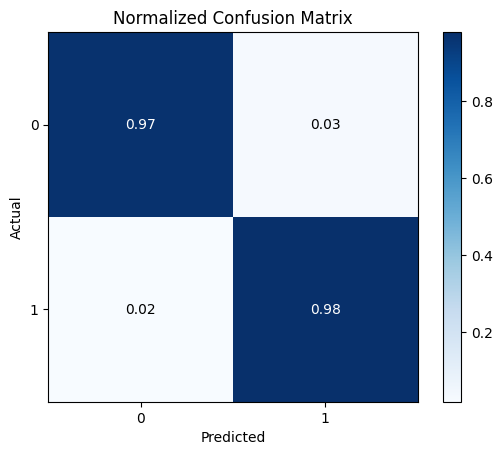

In [63]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão Normalizada')
plt.show()

USANDO O ALGORITMO Random Forest Classifier - Teste 2

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

In [54]:
y_pred = rf.predict(X_test_scaled)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(" Acuracia:", accuracy_rf*100)

print(classification_report(y_test, y_pred))

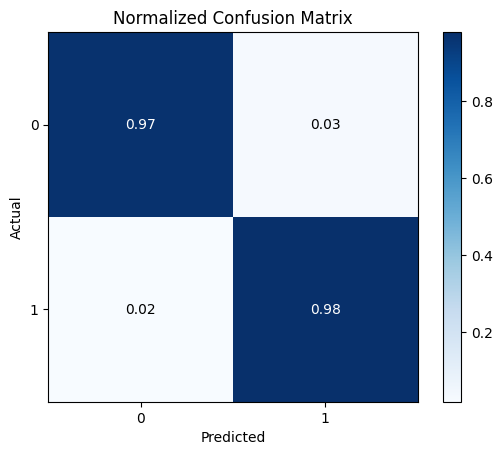

In [60]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

USANDO O ALGORITMO Decision Tree Classifier - Teste 3

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [67]:
y_pred = dt.predict(X_test_scaled)

In [70]:
accuracy_dt = accuracy_score(y_test,y_pred)

In [73]:
print("Acuracia:", accuracy_rf*100)

print(classification_report(y_test, y_pred))

Accuracy: 97.72727272727273
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



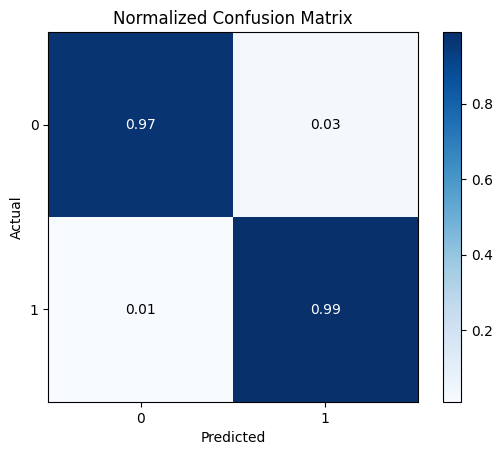

In [77]:
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

COMPARANDO OS TRÊS ALGORITMOS UTILIZADOS DENTRO DA BASE DE DADOS

In [78]:
model_names = ['Regressão Logistica', 'Random Forest', 'Arvore de Decisao']
accuracies = [accuracy, accuracy_rf, accuracy_dt]
data = {'Modelo': model_names, 'Acurácia': accuracies}
df_accuracy = pd.DataFrame(data)
fig = px.bar(df_accuracy, x='Modelo', y='Acuracia', color='Modelo', title='Comparação da Acurácia dos Modelos')
fig.show()